In [1]:
## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
study_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice. 249
mouseid_group = study_data_complete.groupby("Mouse ID")

# mouse_count
count_mouseid = len(mouseid_group["Mouse ID"].count())
count_mouseid

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Use pandas duplicated function to identify Mouse ID with duplicate data
duplicate_mouse_ids = study_data_complete[study_data_complete.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse_ids




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = study_data_complete[study_data_complete["Mouse ID"] != "g989"]
clean_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame
mouseid_group = clean_data.groupby("Mouse ID")

# mouse_count
count_mouseid = len(mouseid_group["Mouse ID"].count())
count_mouseid

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_table2 = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_stats = clean_data.groupby("Drug Regimen")

# Mean of Tumor volume for each drug regimen 
tumor_vol_mean = tumor_stats["Tumor Volume (mm3)"].mean()

# Median of Tumor volume for each drug regimen 
tumor_vol_median = tumor_stats["Tumor Volume (mm3)"].median()

# Variance of Tumor volume for each drug regimen 
tumor_vol_variance = tumor_stats["Tumor Volume (mm3)"].var()

# Standard deviation of Tumor volume for each drug regimen 
tumor_vol_sd = tumor_stats["Tumor Volume (mm3)"].std()

# Standard Error of Tumor volume for each drug regimen 
tumor_vol_sem = tumor_stats["Tumor Volume (mm3)"].sem()

summary_tumorvol_regimen = pd.DataFrame({"Tumor Volume Mean ": tumor_vol_mean,
                                         "Tumor Volume Median ": tumor_vol_median,
                                          "Tumor Volume Variance ": tumor_vol_variance,
                                          "Tumor Volume Standard Deviation ": tumor_vol_sd,
                                          "Tumor Volume Standard Error ": tumor_vol_sem})
                                      
summary_tumorvol_regimen.head(10)

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# How many mice per regimen
mouse_regimen = clean_data['Drug Regimen'].value_counts()
mouse_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

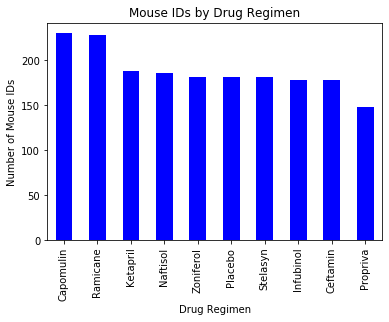

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

mouse_regimen.plot(kind="bar", title="Mouse IDs by Drug Regimen", color = "b", legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse IDs")
plt.show()
plt.tight_layout()


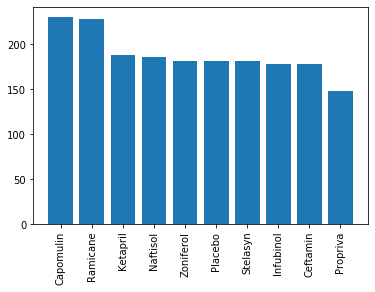

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(mouse_regimen.index.values,mouse_regimen.values)
plt.xticks(rotation=90)
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribtuion = clean_data['Sex'].value_counts()
gender_distribtuion


Male      958
Female    922
Name: Sex, dtype: int64

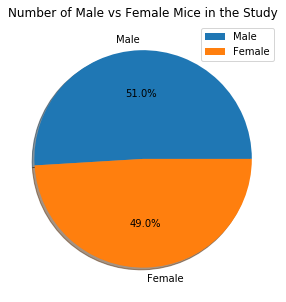

<Figure size 432x288 with 0 Axes>

In [13]:
gender_distribtuion.plot(kind="pie", title="Number of Male vs Female Mice in the Study", legend=True, startangle=0, shadow=True, autopct='%1.1f%%',figsize=(10,5))
plt.ylabel('') 
plt.show()
plt.tight_layout()


In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# pie2.plot.pie(gender_distribution.index, explode=explode)
df = gender_distribution["Mouse ID"]
my_labels = 'Male','Female'
plt.pie(df,labels=my_labels,autopct='%1.1f%%')
plt.title('Mice Gender')
plt.axis('equal')
plt.show()
plt.tight_layout()


NameError: name 'gender_distribution' is not defined

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_df = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
mouse_df = mouse_df.reset_index()
mouse_df.head()


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [16]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
newmerge_df = mouse_df.merge(clean_data, on= ["Mouse ID", "Timepoint"], how = "left")
newmerge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
# newmerge_df = mouse_df.merge(clean_data, on= ["Mouse ID", "Timepoint"], how = "left")
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = newmerge_df.loc[newmerge_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(final_tumor)

# Determine outliers using upper and lower bounds
quartiles = final_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"The value following is the IQR: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The value following is the IQR: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


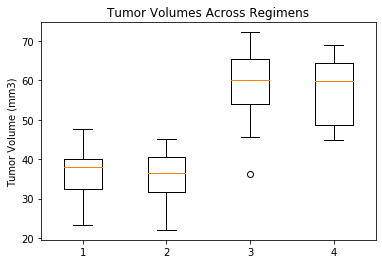

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# tumor_vol.sort()
# tumor_vol

fig1,ax1 = plt.subplots()
ax1.set_title('Tumor Volumes Across Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.show()
              


## Line and Scatter Plots

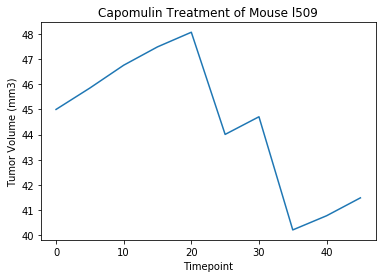

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
capomulin_mouse = capomulin_table.loc[(clean_data["Mouse ID"]=="l509"),:]
lines = capomulin_mouse.plot.line(x='Timepoint', y='Tumor Volume (mm3)', legend=False)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

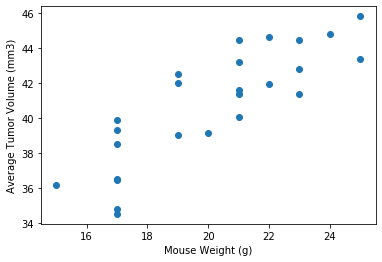

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
capomulin_average = capomulin_table.groupby("Mouse ID").mean()
# capomulin_average

plt.scatter(capomulin_average['Weight (g)'],capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_average

weight = capomulin_average.iloc[:,1]
tumor = capomulin_average.iloc[:,3]
correlation = st.pearsonr(weight,tumor)

print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The correlation between both factors is 0.84


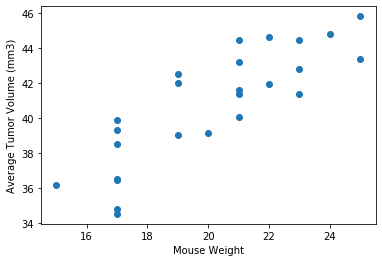

In [55]:
# Create Plot
plt.scatter(weight,tumor)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

y = 0.95x + 21.55
The r-squared is: 0.7088568047708717


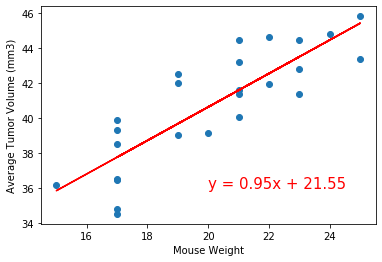

In [58]:
# Perform a linear regression on mouse weight vs. average tunor volume
x_values = capomulin_average["Weight (g)"]
y_values = capomulin_average["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the figure to a file with name
plt.savefig("Correlation and Regression")

# Show plot
plt.show()
